In [37]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import glob
import random

In [3]:
input_path = 'forcebiology/data/brightfield'
masks_path = 'forcebiology/data/masks'

In [4]:
image_paths = glob.glob(input_path + '/*/*')
mask_paths = glob.glob(masks_path + '/*')

In [48]:
def get_masks_paths(image_paths):
    mask_paths = []

    for image_path in image_paths:

        image_name = image_path.split('/')[-1].split('.')[0]

        image_name_split = image_name.split('z')

        print(image_name_split[:-1])

        image_name_split[-1] = '06c1_ORG_mask.tiff'

        new_image_name = 'z'.join(image_name_split)

        mask_path = masks_path + '/' + new_image_name

        mask_paths.append(mask_path)

    return mask_paths

In [49]:
random_image_paths = random.sample(image_paths, 5)
random_mask_paths = get_masks_paths(random_image_paths)

['Alexa488_Fibroblasts_well6_135locations_s020']
['Alexa488_Fibroblasts_well4_225locations_s090']
['Alexa488_Fibroblasts_well5_225locations_s036']
['Alexa488_Fibroblasts_well7_135locations_s074']
['Alexa488_Fibroblasts_well4_225locations_s197']


In [50]:
print(random_image_paths)
print(random_mask_paths)

['forcebiology/data/brightfield/Alexa488_Fibroblasts_well6_135locations/Alexa488_Fibroblasts_well6_135locations_s020z02c2_ORG.tif', 'forcebiology/data/brightfield/Alexa488_Fibroblasts_well4_225locations/Alexa488_Fibroblasts_well4_225locations_s090z04c2_ORG.tif', 'forcebiology/data/brightfield/Alexa488_Fibroblasts_well5_225locations/Alexa488_Fibroblasts_well5_225locations_s036z04c2_ORG.tif', 'forcebiology/data/brightfield/Alexa488_Fibroblasts_well7_135locations/Alexa488_Fibroblasts_well7_135locations_s074z05c2_ORG.tif', 'forcebiology/data/brightfield/Alexa488_Fibroblasts_well4_225locations/Alexa488_Fibroblasts_well4_225locations_s197z08c2_ORG.tif']
['forcebiology/data/masks/Alexa488_Fibroblasts_well6_135locations_s020z06c1_ORG_mask.tiff', 'forcebiology/data/masks/Alexa488_Fibroblasts_well4_225locations_s090z06c1_ORG_mask.tiff', 'forcebiology/data/masks/Alexa488_Fibroblasts_well5_225locations_s036z06c1_ORG_mask.tiff', 'forcebiology/data/masks/Alexa488_Fibroblasts_well7_135locations_s074z

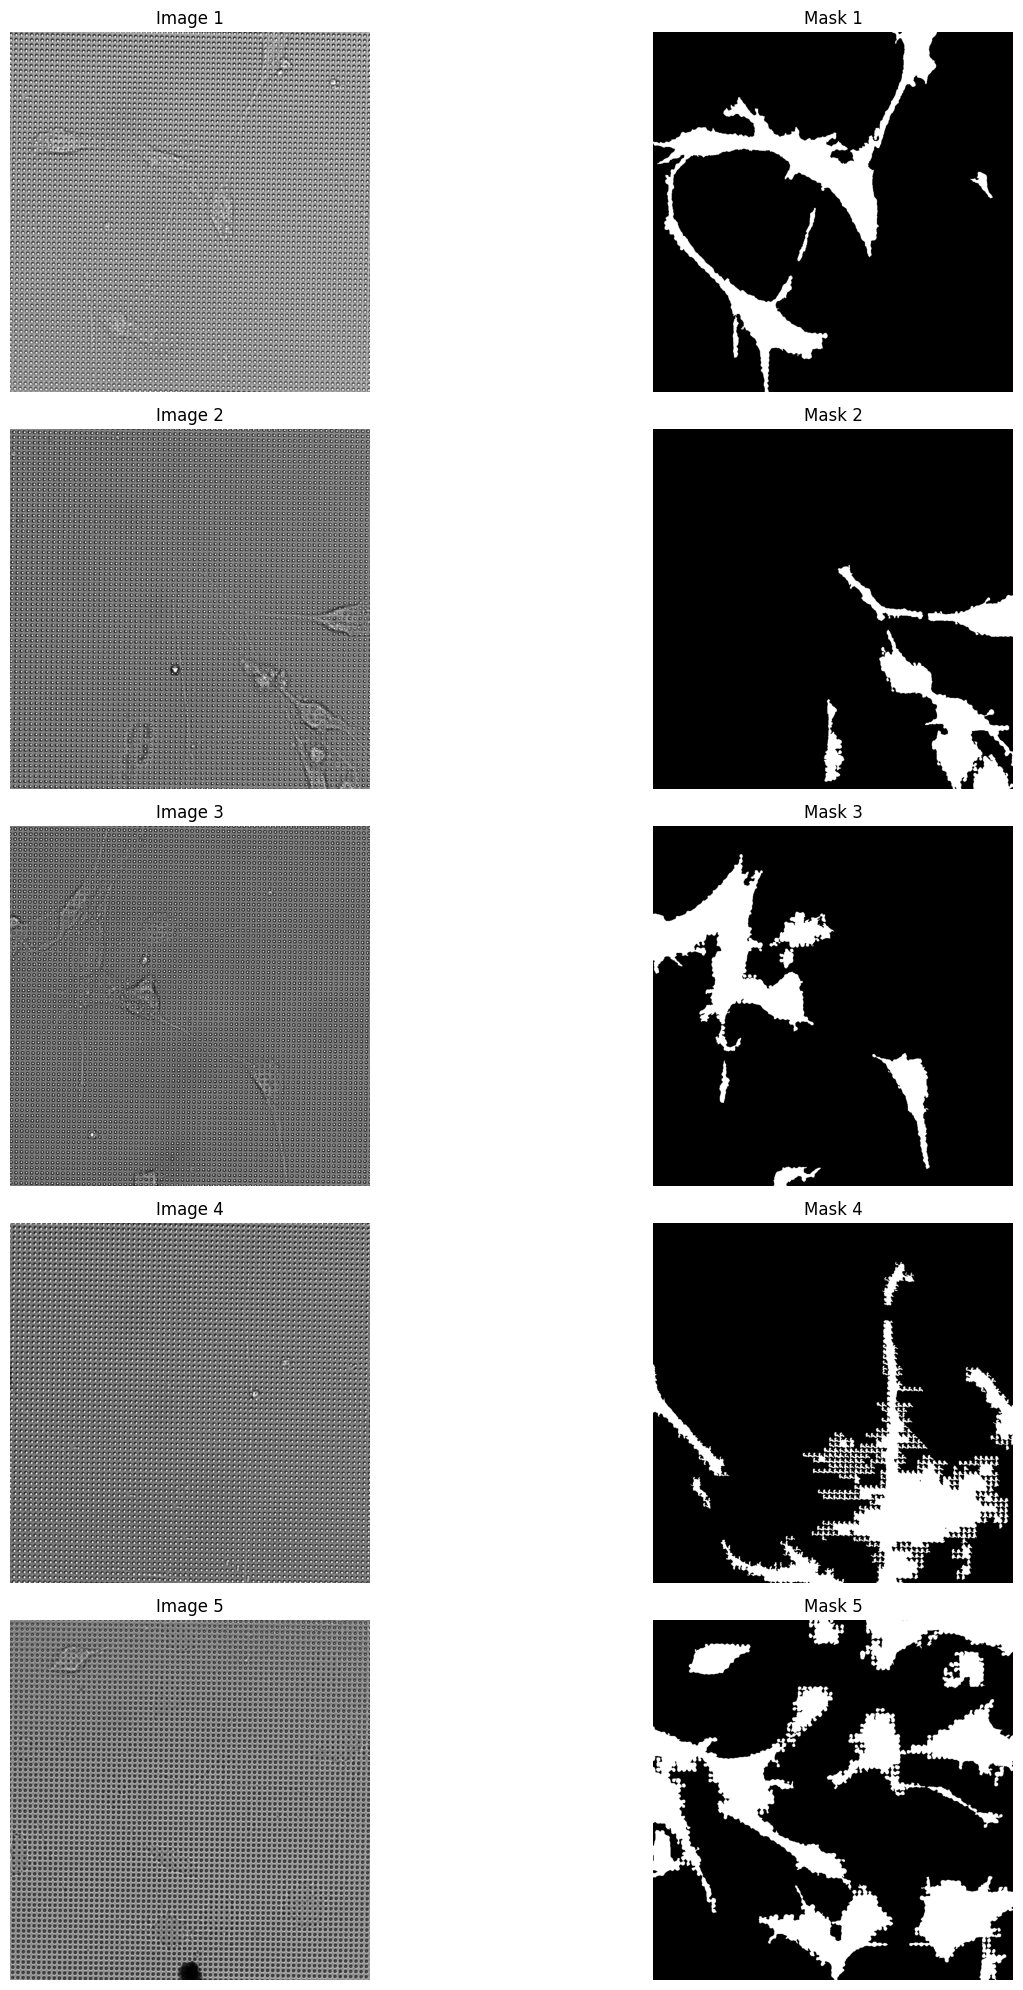

In [52]:
def visualize_data(image_paths, mask_paths):
    no_images = len(image_paths)
    
    plt.figure(figsize=(16, no_images * 4))

    for i, (image_path, mask_path) in enumerate(zip(image_paths, mask_paths)):
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)

        plt.subplot(no_images, 2, 2 * i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(f"Image {i+1}")
        
        plt.subplot(no_images, 2, 2 * i + 2)
        plt.imshow(mask, cmap='gray')
        plt.axis('off')
        plt.title(f"Mask {i+1}")

    plt.tight_layout()
    plt.show()

visualize_data(random_image_paths, random_mask_paths)